In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from zipfile import ZipFile
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error




C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
path = r"C:\Users\yi6\Desktop\Bike_Share_Project\zips"
zip_list = glob.glob(path + "/*.zip")
df_list = []
for each in zip_list:
    zf = ZipFile(each)
    for text_file in zf.infolist():
        if text_file.filename.endswith('.csv'):
            df = pd.read_csv(zf.open(text_file.filename), parse_dates = True, header = 0)
            df.columns = df.columns.str.lower() 
            df.columns = df.columns.str.replace(' ','') 
    df_list.append(df)
    
df = pd.concat(df_list, axis = 0)
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

# l = [pd.read_csv(ZipFile(filename), parse_dates = True, header = 0) for filename in glob.glob(path + "/*.zip")]
# df = pd.concat(l, axis=0)

   bikeid  birthyear  endstationid  endstationlatitude  endstationlongitude  \
0   24722     1975.0          3185           40.717733           -74.043845   
1   24388        NaN          3187           40.721124           -74.038051   
2   24442     1962.0          3183           40.716247           -74.033459   
3   24678     1977.0          3203           40.727596           -74.044247   
4   24574     1977.0          3186           40.719586           -74.043117   

   endstationname  gender name_localizedvalue0  startstationid  \
0       City Hall       1                  NaN            3185   
1       Warren St       0                  NaN            3183   
2  Exchange Place       1                  NaN            3183   
3   Hamilton Park       2                  NaN            3203   
4   Grove St PATH       2                  NaN            3203   

   startstationlatitude  startstationlongitude startstationname  \
0             40.717733             -74.043845        City Ha

In [0]:
df.columns = ['bike_id', 'birth_year', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'end_station_name', 'gender',
       'name_localized_value', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'start_station_name', 'start_time', 'stop_time',
       'trip_duration', 'user_type']

del df['name_localized_value']


print(df.head())

   bike_id  birth_year  end_station_id  end_station_latitude  \
0    24722      1975.0            3185             40.717733   
1    24388         NaN            3187             40.721124   
2    24442      1962.0            3183             40.716247   
3    24678      1977.0            3203             40.727596   
4    24574      1977.0            3186             40.719586   

   end_station_longitude end_station_name  gender  start_station_id  \
0             -74.043845        City Hall       1              3185   
1             -74.038051        Warren St       0              3183   
2             -74.033459   Exchange Place       1              3183   
3             -74.044247    Hamilton Park       2              3203   
4             -74.043117    Grove St PATH       2              3203   

   start_station_latitude  start_station_longitude start_station_name  \
0               40.717733               -74.043845          City Hall   
1               40.716247               -7

In [0]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['stop_time'] = pd.to_datetime(df['stop_time'])
df['trip_duration'] = df.trip_duration.astype('int')
df['trip_duration_min'] = df.trip_duration.div(60)
print(df.head())
print(df.info())
print(df.describe())

   bike_id  birth_year  end_station_id  end_station_latitude  \
0    24722      1975.0            3185             40.717733   
1    24388         NaN            3187             40.721124   
2    24442      1962.0            3183             40.716247   
3    24678      1977.0            3203             40.727596   
4    24574      1977.0            3186             40.719586   

   end_station_longitude end_station_name  gender  start_station_id  \
0             -74.043845        City Hall       1              3185   
1             -74.038051        Warren St       0              3183   
2             -74.033459   Exchange Place       1              3183   
3             -74.044247    Hamilton Park       2              3203   
4             -74.043117    Grove St PATH       2              3203   

   start_station_latitude  start_station_longitude start_station_name  \
0               40.717733               -74.043845          City Hall   
1               40.716247               -7

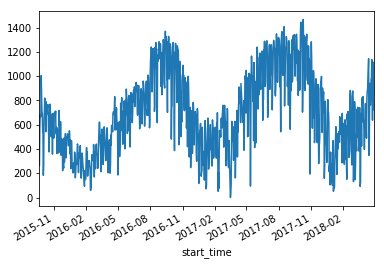

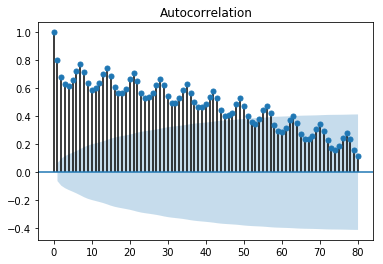

In [0]:
df.start_time = pd.to_datetime(df.start_time, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df.set_index(df.start_time, inplace = True)


# time series plot
         
            # time series plot
df_day = df['bike_id'].groupby(df.index).count().resample('D').sum().dropna()
del df_day["Feb 29 2016"]

df_day.plot()
plt.show()


plot_acf(df_day, lags=80, alpha = .05)
plt.show()

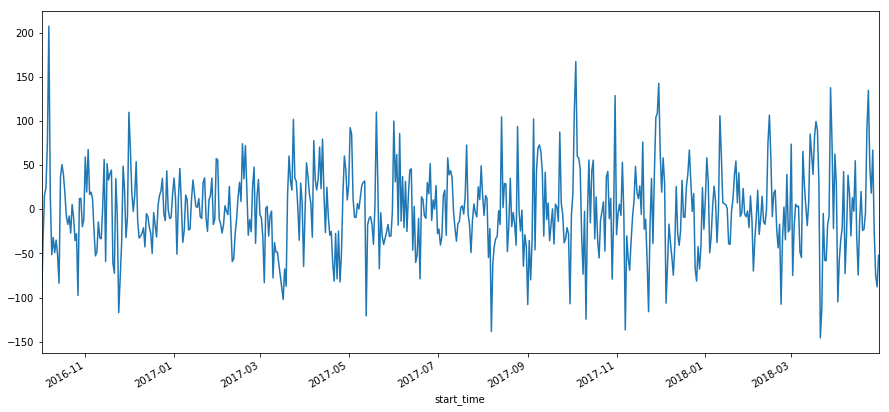

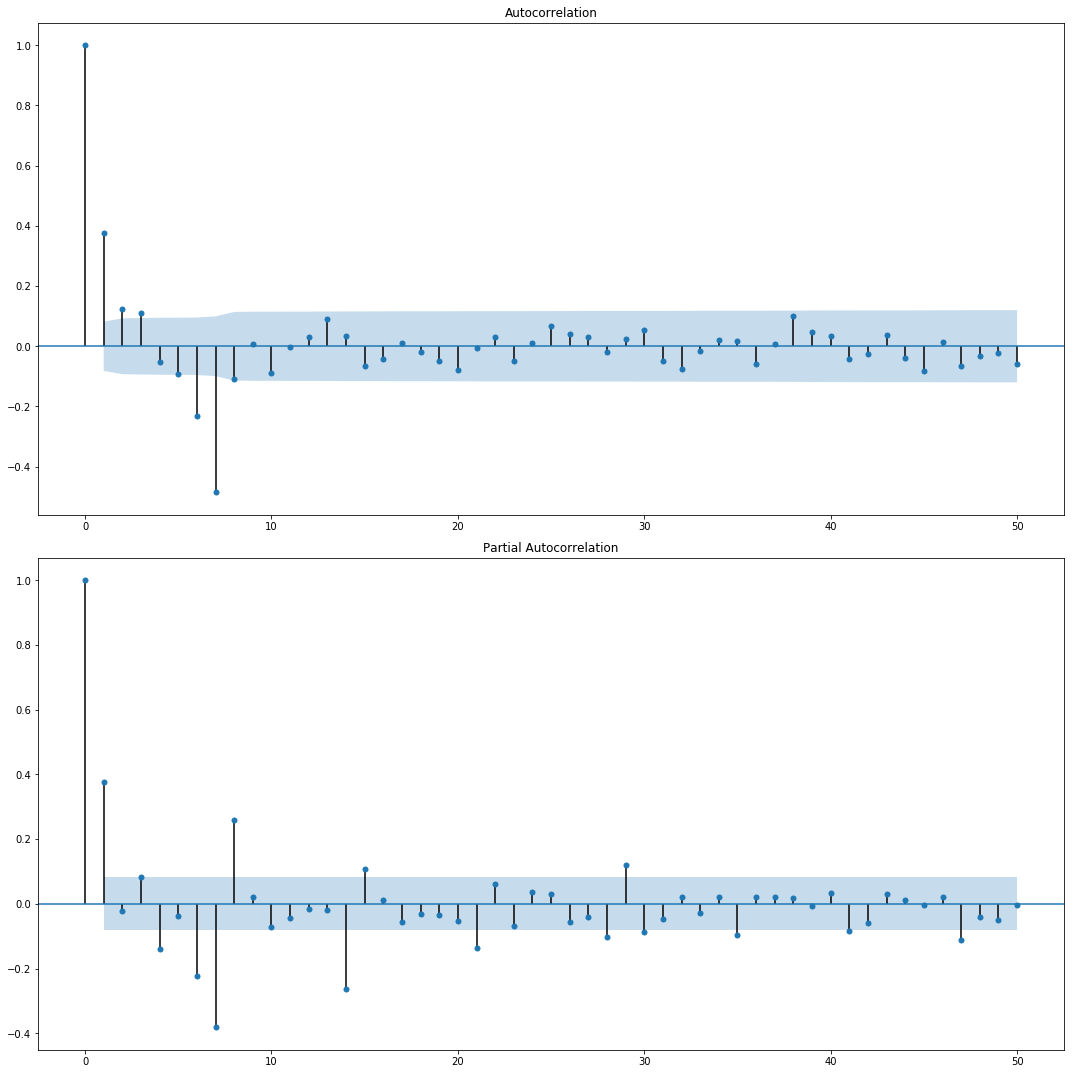

test statistic:  -8.34514597425
p value:  3.09988389509e-13


In [0]:
##stationary timeseries

df_day_7 = df_day.dropna().rolling(7).mean()
df_day_season = df_day_7.sub(df_day_7.shift(365))
df_day_trend = df_day_season.sub(df_day_season.shift(1)).dropna()

df_day_trend.plot(figsize = (15,7))
plt.show()

fig, axes = plt.subplots(2,1)
fig.set_size_inches(15,15)
plot_acf(df_day_trend, lags=50, alpha = .05, ax = axes[0])
plot_pacf(df_day_trend, lags=50, alpha = .05, ax = axes[1])
plt.tight_layout(True)
plt.show()

df_test = adfuller(df_day_trend)
print('test statistic: ', df_test[0])
print('p value: ', df_test[1])


# decomp = sm.tsa.seasonal_decompose(df_day_7, freq = 365)
# decomp.plot()
# plt.show()


In [0]:
##Code credit: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
df_day_7_list= [x for x in df_day_7.dropna()]
df_day_trend_list= [x for x in df_day_trend.dropna()]

def arima_error(frame, arima_order):
    train_len = int(len(frame) *.8)
    test_len = int(len(frame)* .2)
    train_df = frame[:train_len]
    test_df = frame[train_len:]
    pred_list = []
    test_update = [x for x  in test_df]
    train_update = [x for x in train_df]

    for each in test_update:
        model  = ARIMA(train_update, order = arima_order)
        model_fit = model.fit(disp = 0)
        pred = model_fit.forecast()[0]
        pred_list.append(pred)
        train_update.append(each)
    mse = mean_squared_error(test_update, pred_list)
    aic = model_fit.aic
   
    return mse, aic


def model_fit(frame, p_val, d_val, q_val):
    best_score, best_config = float("inf"), None
    for p in p_val:
        for d in d_val:
            for q in q_val:
                arima_order = (p,d,q)
                try:
                    error, aic = arima_error(frame, arima_order)
                    if error < best_score:
                        best_score, best_config = error, arima_order
                    print("order: " , arima_order, "error: ", error, "aic: " ,aic)
                except:
                    continue
    print("best order: " , best_score, "error: ", best_config, "aic: " ,aic)
    return print("done")
    
p = np.arange(3)
d = np.arange(3)
q = np.arange(3)

model_fit(df_day_trend_list,p,d,q)

order:  (0, 0, 0) error:  2599.95507663 aic:  6023.41879515
order:  (0, 0, 1) error:  2103.07922888 aic:  5940.6504413
order:  (0, 0, 2) error:  2131.87870907 aic:  5941.99622751


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (0, 1, 0) error:  3083.07129594 aic:  6137.00147898
order:  (0, 1, 1) error:  2767.15626201 aic:  6036.80737498


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (0, 1, 2) error:  2114.18437483 aic:  5938.86226056
order:  (0, 2, 0) error:  7266.40294159 aic:  6668.9528936
order:  (0, 2, 1) error:  3098.6147543 aic:  6135.51526423
order:  (1, 0, 0) error:  2180.14179383 aic:  5939.12789132
order:  (1, 0, 1) error:  2187.59383334 aic:  5940.61701719
order:  (1, 0, 2) error:  2161.08848705 aic:  5940.83302102
order:  (1, 1, 0) error:  3043.50465171 aic:  6086.20979644


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (1, 1, 1) error:  2192.14650291 aic:  5937.0710786


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (1, 1, 2) error:  2202.16948558 aic:  5938.63748506
order:  (1, 2, 0) error:  6151.84217065 aic:  6473.04880699
order:  (2, 0, 0) error:  2186.01068284 aic:  5940.88115783
order:  (2, 0, 1) error:  2156.81114044 aic:  5939.2413188
order:  (2, 0, 2) error:  2130.40010338 aic:  5939.19769464


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (2, 1, 0) error:  2618.91912964 aic:  6032.16621112


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (2, 1, 1) error:  2199.55840226 aic:  5938.86193483


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\mo

order:  (2, 1, 2) error:  2138.23491788 aic:  5937.26401618
order:  (2, 2, 0) error:  4363.19096989 aic:  6288.7195173


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


order:  (2, 2, 1) error:  2633.93095497 aic:  6031.86515787


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


best order:  2103.07922888 error:  (0, 0, 1) aic:  6031.86515787
done


C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  571
Model:                     ARMA(0, 1)   Log Likelihood               -2967.325
Method:                       css-mle   S.D. of innovations             43.713
Date:                Thu, 24 May 2018   AIC                           5940.650
Time:                        13:44:41   BIC                           5953.693
Sample:                             0   HQIC                          5945.739
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4789      2.538     -0.189      0.850      -5.452       4.495
ma.L1.y        0.3878      0.039     10.019      0.000       0.312       0.464
                                    Roots           

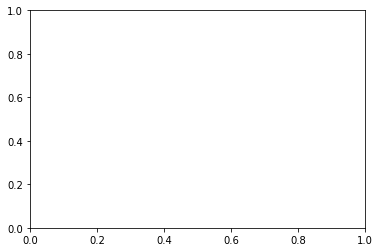

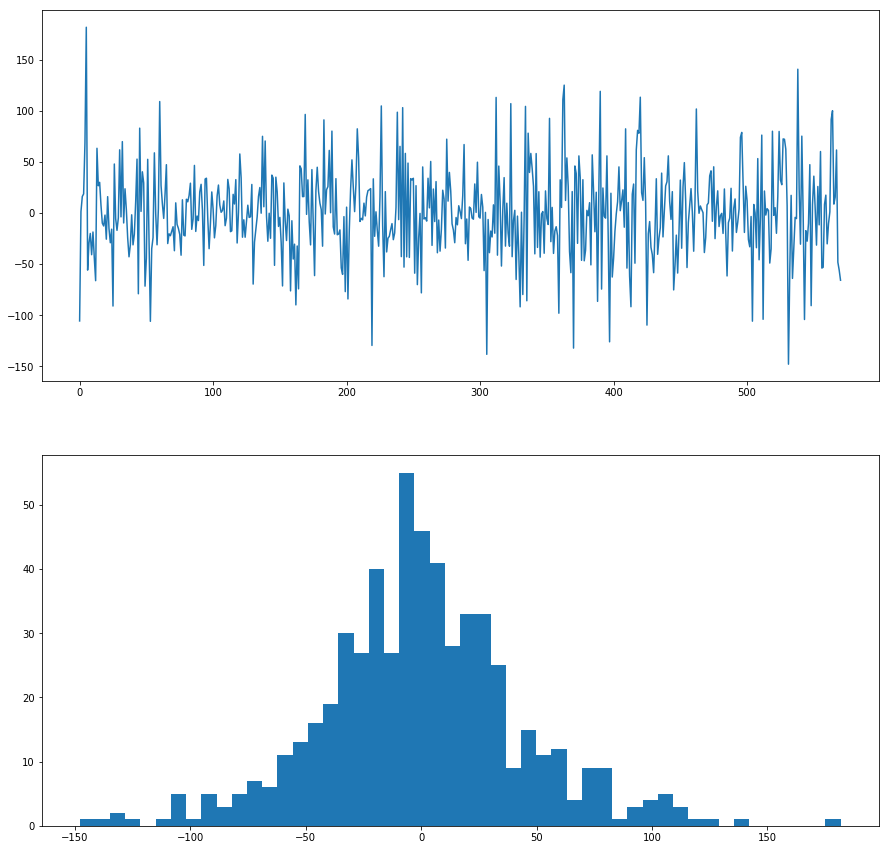

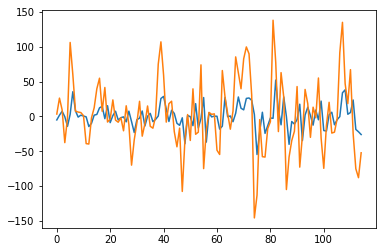

0.0379250853318


In [0]:
train_len = int(len(df_day_trend) *.8)
test_len = int(len(df_day_trend)* .2)
train_df = df_day_trend[:train_len]
test_df = df_day_trend[train_len:]
pred_list = []
test_update = [x for x  in test_df]
train_update = [x for x in train_df]

for each in test_update:
    model  = ARIMA(train_update, order = (0,0,1))
    model_fit = model.fit(disp = 0)
    pred = model_fit.forecast()[0]
    pred_list.append(pred)
    train_update.append(each)
        


print(model_fit.summary())

fig, ax = plt.subplots(nrows = 2, ncols = 1)
fig.set_size_inches(15,15)
ax[0].plot(model_fit.resid)
ax[1].hist(model_fit.resid, bins = 50)
plt.show()

plt.plot(pred_list)
plt.plot(test_update)
plt.show()

print(model_fit.resid.mean())

# fig, axes = plt.subplots(2,1)
# fig.set_size_inches(15,15)
# plot_acf(df_day_trend, lags=50, alpha = .05, ax = axes[0])
# plot_pacf(df_day_trend, lags=50, alpha = .05, ax = axes[1])
# plt.tight_layout(True)
# plt.show()


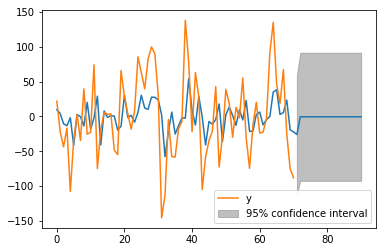

In [0]:
model_fit.plot_predict(start = 500, end = 590)
plt.show()